# **Импортируем библиотеки**

In [18]:
# !pip install keras

In [19]:
import cv2 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow_datasets.object_detection import wider_face

Для наглядной демонстрации алгоритмов машинного зрения  и нейросетей построю модель для распознавания рукописных цифр


Подключаем гугл диск

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Загружаем датасет с набором рукописных цифр


Разделим на обучающую и тестовую выборку

In [21]:
# Загрузка датасета
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Преобразование данных и меток классов в нужный формат
X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255.0
y_train = to_categorical(y_train)

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255.0
y_test = to_categorical(y_test)



Создаём и обучаем модель

In [22]:
# Создание модели
model = Sequential()

# Добавление сверточных слоев
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Добавление слоя сглаживания
model.add(Flatten())

# Добавление полносвязных слоев
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.1421 - accuracy: 0.9574 - val_loss: 0.0443 - val_accuracy: 0.9851
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.0324 - val_accuracy: 0.9885
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0298 - val_accuracy: 0.9887
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 0.0346 - val_accuracy: 0.9892
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0306 - val_accuracy: 0.9906
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0341 - val_accuracy: 0.9905
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0115 - accuracy: 0.9959 - val_loss: 0.0334 - val_acc

Можно заметить,что за все эпохи обучения точность модели увеличилась и достигла точности **0.9978**,а **loss** значительно упал.

Загружаем фото

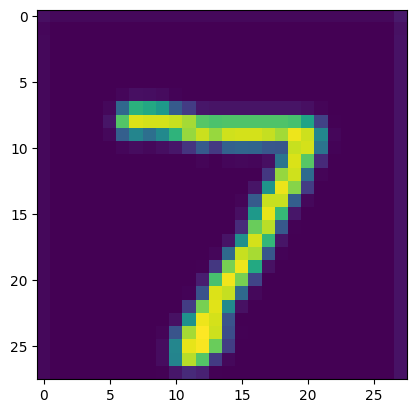

In [24]:
# Загрузка изображения цифры 7


img = Image.open("/content/drive/MyDrive/data_science/digit.png")


# Приведение к черно-белому формату
img = img.convert('L')

# Изменение размера изображения
img = img.resize((28, 28))

# Преобразование изображения в массив numpy
img_arr = np.array(img)

# Изменение формы массива для входных данных модели
img_arr = img_arr.reshape(1, 28, 28, 1)

#Отобразим цифру которую хотим предсказать
plt.imshow(img)
plt.show()




Протестируем нашу модель

In [25]:
pred = model.predict(img_arr)
print(f"Предсказанная цифра: {np.argmax(pred)}")

1/1 [==============================] - 0s 242ms/step
Предсказанная цифра: 7


**Вывод:** Свёрточная нейросеть отлично справилась с распознаванием цифр.